#  Predicting Student Dropouts

An end-to-end data analysis project to identify factors leading to student dropout and propose actionable interventions.

##  Problem Framing & Hypothesis

- Hypotheses:
  - Students with unpaid tuition fees are more likely to drop out.
  - Lower grades in the first semester predict a higher chance of dropout.
  - Students in specific programs (e.g., Mechanical, Social Service) have higher dropout risks.

  ##  Descriptive Analysis

I Explored the dataset to understand basic patterns, distributions, and relationships. Includes visualizations and summaries of key variables.

## Diagnostic Analysis

Dive deeper into the factors that may be influencing dropouts, including course-specific risks, financial status, and academic performance.

## Predictive Modeling

Using machine learning models to predict dropouts and extract feature importances. Evaluate model performance using metrics like accuracy, precision, recall, and F1 score.

##  Prescriptive Insights

Translate insights into actions. Suggest interventions such as early academic support and financial aid targeting at-risk students.

##  Conclusions & Recommendations

Summarize key findings, model results, and propose data-backed recommendations to improve student retention.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

### Problem Statement
Identify key factors that lead to student dropouts using academic, financial, and demographic data.

### Hypothesis
- Students with low academic performance are more likely to drop out.
- Students who are in debt or have unpaid tuition fees are at higher risk of dropout.
- Certain courses and demographics may show higher dropout rates.

Goal:

The goal is to analyze academic and demographic data to identify key indicators of student dropout and predict dropout risk effectively

Provide insights on which factors (features) are most associated with dropout.

 Key Performance Indicators (KPIs):

Classification Accuracy

Precision, Recall, F1-Score (especially for the "Dropout" class)

Confusion Matrix

Feature Importance (interpretability).

In [83]:
df = pd.read_csv('/content/Student_dropout.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [85]:
# Define categorical columns
categorical_columns = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'
]

# Convert these columns to 'category' type
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [86]:
# Checking dataset after coverting some numerical dataset into categorical.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance                      4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Nacionality                                     4424 non-null   category
 7   Mother's qualification                          4424 non-null   category
 8   Father's qualification                          4424 non-null   category
 9   Mother's occupation           

In [87]:
df.describe()

,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [88]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [89]:
# Checking the null values in the dataset
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


There is no null value in the data set

# Performing EDA (Exploratory Data Analysis)

###  Enrollment Analysis

In this section, we analyze the distribution of student outcomes: Dropout, Graduate, and Currently Enrolled.

Note: All students in this dataset were initially enrolled. Their final status is represented in the `Target` column. So the total initial enrollment is calculated as:

**Initial Enrolled = Dropout + Graduate + Enrolled (still studying)**

This helps us understand student retention and success rates.


In [90]:
# Count each target group
target_counts = df['Target'].value_counts()
print("Target Distribution:\n", target_counts)
# Calculate total enrolled students
total_enrolled = target_counts['Dropout'] + target_counts['Graduate'] + target_counts['Enrolled']
print(f"\n Total Students Ever Enrolled: {total_enrolled}")


Target Distribution:
 Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

 Total Students Ever Enrolled: 4424


/tmp/ipython-input-91-1187439778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='Set2')


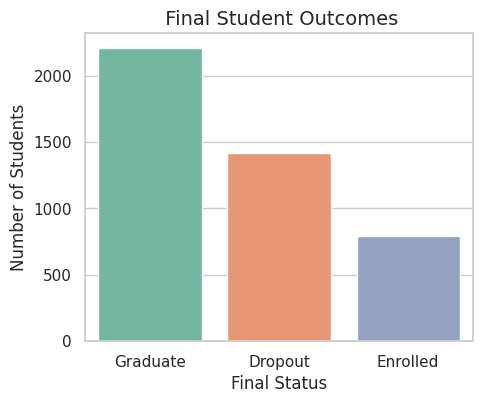

In [91]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='Set2')
plt.title(" Final Student Outcomes", fontsize=14)
plt.xlabel("Final Status")
plt.ylabel("Number of Students")
plt.show()

###  Insights:

- A total of **4424 students** were initially enrolled.
- **2209 students graduated**, representing ~50% success rate.
- **1421 students dropped out**, which indicates potential areas of improvement.
- **794 students are currently enrolled**, and their final status is yet to be determined.

This analysis gives an overall picture of student outcomes and helps in identifying dropout trends.

| Target Value | Meaning                      |
| ------------ | ---------------------------- |
| Dropout      | Enrolled → Later dropped out |
| Enrolled     | Enrolled → Still studying    |
| Graduate     | Enrolled → Completed course  |



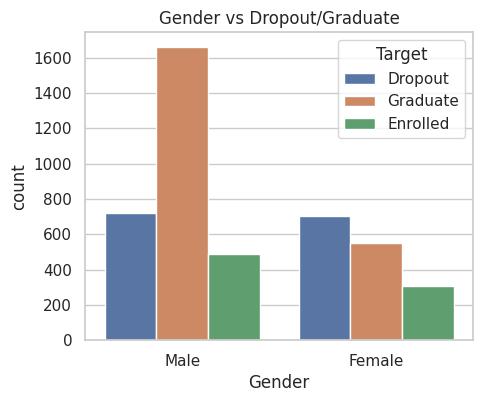

In [92]:
# Gender distribution by outcome
plt.figure(figsize=(5, 4))
sns.countplot(x='Gender', hue='Target', data=df)
plt.title('Gender vs Dropout/Graduate')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

In [93]:
gender_outcome_counts = df.groupby(['Gender', 'Target']).size().unstack().fillna(0).astype(int)
gender_outcome_counts.index = ['Male', 'Female']
# Display the result
print("Gender-wise Outcome Distribution:\n")
display(gender_outcome_counts)
# Calculate total enrolled students
total_enrolled = target_counts['Dropout'] + target_counts['Graduate'] + target_counts['Enrolled']
print(f"\n Total Students Ever Enrolled: {total_enrolled}")


Gender-wise Outcome Distribution:



/tmp/ipython-input-93-462888979.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_outcome_counts = df.groupby(['Gender', 'Target']).size().unstack().fillna(0).astype(int)


Target,Dropout,Enrolled,Graduate
Male,720,487,1661
Female,701,307,548



 Total Students Ever Enrolled: 4424


###  Insight: Dropout Count vs Dropout Rate by Gender

- **In absolute numbers**, **more male students (720)** dropped out compared to female students (701).
- However, **in percentage terms**, **female students have a higher dropout rate**.

#### Dropout Rate:
- **Male:** 720 / 2868 ≈ **25.1%**
- **Female:** 701 / 1556 ≈ **45.1%**

 This means **female students are more likely to drop out**, even though fewer females are enrolled overall.


# Top 15 Dropout Factor

In [94]:
df_encoded = df.copy()
# Encode only the categorical columns
le_dict = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

In [95]:
df_encoded['Dropout_Flag'] = (df['Target'] == 'Dropout').astype(int)

In [96]:
X = df_encoded.drop(columns=['Target', 'Dropout_Flag'])
y = df_encoded['Dropout_Flag']


In [97]:
# Spliting Data and Train Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

/tmp/ipython-input-98-1503978552.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_15, palette='viridis')


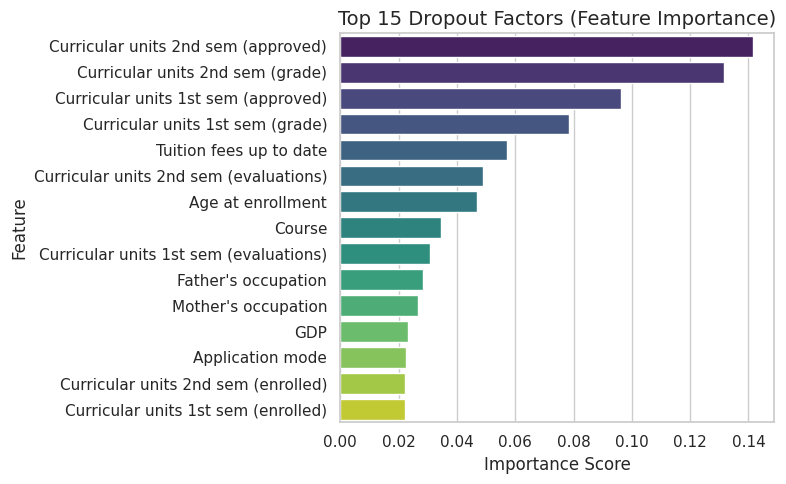

In [98]:
#  Extract and Plot Top 15 Feature Importances
importances = model.feature_importances_
features = X.columns
# Create DataFrame
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
# Sort and get top 15
top_15 = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=top_15, palette='viridis')
plt.title('Top 15 Dropout Factors (Feature Importance)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


###  Insights:
- These are the top 15 features influencing **student dropout predictions**.
- Academic indicators like **grades**, **number of approved units**, and **evaluation activity** are the strongest predictors.
- Financial risk signals such as **debtor status** and **tuition fee delays** are also strongly associated with higher dropout likelihood.
- Social and background indicators like **parental occupation**, **attendance mode (day/evening)**, and **age at enrollment** also contribute meaningfully.


In [99]:
course_stats = df.groupby('Course')['Target'].value_counts().unstack().fillna(0)
course_stats['Total'] = course_stats.sum(axis=1)
course_stats['Dropout Rate (%)'] = (course_stats['Dropout'] / course_stats['Total'] * 100).round(2)

/tmp/ipython-input-99-2617022164.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  course_stats = df.groupby('Course')['Target'].value_counts().unstack().fillna(0)


In [100]:
# See what categories are available (code → label)
df['Course'].cat.categories

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

In [101]:
course_mapping = {
    1: "Mechanical Engineering",
    2: "Information Technology",
    3: "MBBS Heart Surgeon",
    4: "Nursing",
    5: "Mathematic",
    6: "Management",
    7: "Social Service",
    8: "Civil Engineering",
    9: "Law",
    10: "Journalism",
    11: "Marketing",
    12: "History",
    13: "Psychology",
    14: "Economics",
    15: "Computer Science",
    16: "Philosophy",
    17: "Modeling"
}


In [102]:
# Get top 15
top_15 = course_stats.sort_values(by='Dropout Rate (%)', ascending=False).head(15).copy().reset_index()
top_15['Course Name'] = top_15['Course'].map(course_mapping)

/tmp/ipython-input-103-998222133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


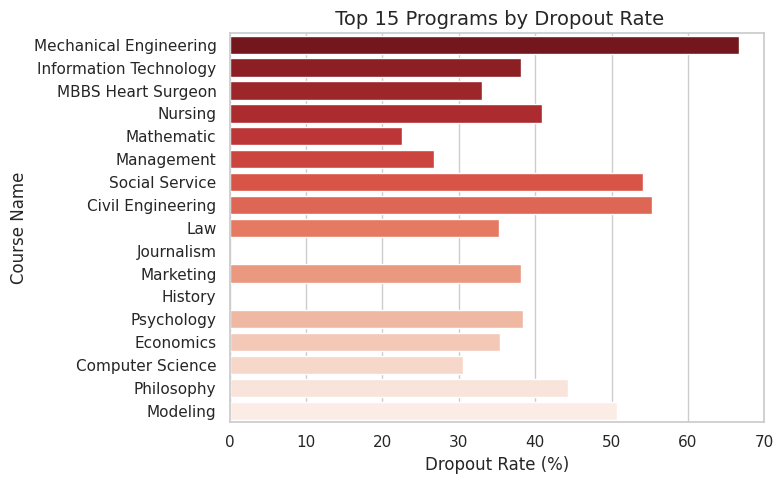

In [103]:
plt.figure(figsize=(8, 5))
sns.barplot(
    y=top_15['Course Name'],
    x=top_15['Dropout Rate (%)'],
    palette='Reds_r'
)
plt.title(" Top 15 Programs by Dropout Rate", fontsize=14)
plt.xlabel("Dropout Rate (%)")
plt.ylabel("Course Name")
plt.tight_layout()
plt.show()


/tmp/ipython-input-104-355592395.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


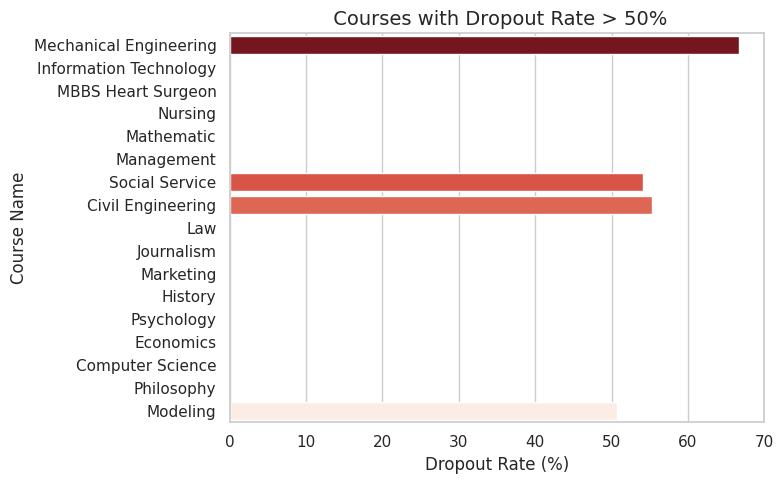

In [104]:
 # Filter for dropout rate > 50%
high_dropout_courses = course_stats[course_stats['Dropout Rate (%)'] > 50].copy().reset_index()
# Map course codes to names
high_dropout_courses['Course Name'] = high_dropout_courses['Course'].map(course_mapping)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    y=high_dropout_courses['Course Name'],
    x=high_dropout_courses['Dropout Rate (%)'],
    palette='Reds_r'
)
plt.title(" Courses with Dropout Rate > 50%", fontsize=14)
plt.xlabel("Dropout Rate (%)")
plt.ylabel("Course Name")
plt.tight_layout()
plt.show()


 High-Risk Programs with Critical Dropout Rates.

 Based on the analysis, four academic programs exhibit dropout rates exceeding 50%, signaling a severe student retention issue:

  Mechanical Engineering

  Civil Engineering

  Social Service

  Modeling

 Among these, Mechanical Engineering stands out as the most concerning —

“Two out of every three students drop out of this program.”

This translates to a dropout rate of 66%, indicating that the program may suffer from:

High academic pressure or curriculum misalignment,

Poor student support or engagement,

Mismatch between student expectations and actual course content.

 Recommendation
To address this, institutions can:

Conduct curriculum audits,

Offer mentorship and academic counseling early in the program,

Investigate student feedback to identify pain points.




In [105]:
high_risk_courses = [1,7,8,17]
df[df['Course'].isin(high_risk_courses)].groupby('Course')['Curricular units 2nd sem (approved)'].mean()


/tmp/ipython-input-105-2135920791.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['Course'].isin(high_risk_courses)].groupby('Course')['Curricular units 2nd sem (approved)'].mean()


,Curricular units 2nd sem (approved)
Course,
1,4.000000
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,2.164706
8,3.113475
9,NaN


/tmp/ipython-input-106-3706872449.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


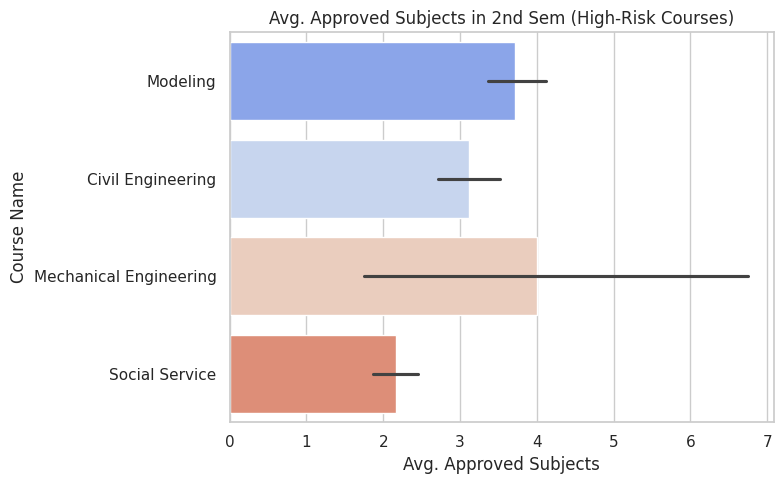

In [106]:
# Maped course codes to names
course_mapping = {
    1: "Mechanical Engineering",
    7: "Social Service",
    8: "Civil Engineering",
    17: "Modeling"
}
df['Course Name'] = df['Course'].map(course_mapping)
# Filter and plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df[df['Course'].isin([1, 7, 8, 17])],
    x='Curricular units 2nd sem (approved)',
    y='Course Name',
    estimator='mean',
    palette='coolwarm'
)
plt.title("Avg. Approved Subjects in 2nd Sem (High-Risk Courses)")
plt.xlabel("Avg. Approved Subjects")
plt.ylabel("Course Name")
plt.tight_layout()
plt.show()


In [107]:
fee_stats = (
    df.groupby('Tuition fees up to date')['Target']
      .value_counts(normalize=True)
      .unstack(fill_value=0)
      .round(3) * 100
)
fee_stats.index = ['Unpaid Fees', 'Fees Up to Date']
display(fee_stats[['Dropout']].rename(columns={'Dropout': 'Dropout Rate (%)'}))


/tmp/ipython-input-107-283432701.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Tuition fees up to date')['Target']


Target,Dropout Rate (%)
Unpaid Fees,86.6
Fees Up to Date,24.7


Key Insight:

Students with unpaid tuition fees are three-and-a-half times more likely to drop out than those who have their fees up to date. Financial barriers are therefore a critical driver of student attrition in this population.

 Prescriptive Recommendation

Early Fee Alerts:

Send automated reminders when fees are overdue by more than one week.

Emergency Financial Aid:

Establish a small grant program for students flagged as debtors to cover outstanding balances.

Flexible Payment Plans:

Offer installment options to reduce the immediate financial burden and improve fee compliance.

/tmp/ipython-input-108-1946307486.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


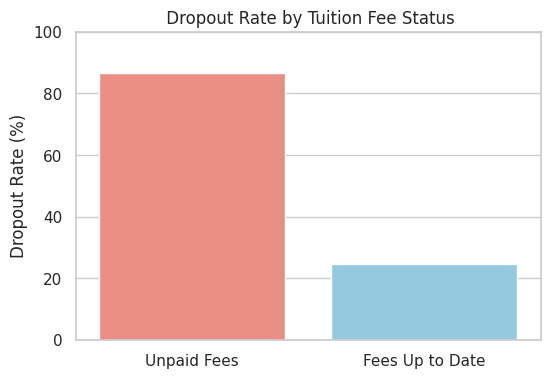

In [108]:
fee_stats = pd.DataFrame({
    'Tuition Fee Status': ['Unpaid Fees', 'Fees Up to Date'],
    'Dropout Rate (%)': [86.6, 24.7]
})
plt.figure(figsize=(6,4))
sns.barplot(
    data=fee_stats,
    x='Tuition Fee Status',
    y='Dropout Rate (%)',
    palette=['salmon','skyblue']
)
plt.title(" Dropout Rate by Tuition Fee Status", fontsize=12)
plt.ylabel("Dropout Rate (%)")
plt.xlabel("")
plt.ylim(0,100)
plt.show()


Students with unpaid tuition fees show a significantly higher dropout rate (86.6%), compared to those with fees up to date (24.7%).

Scholarships, or financial aid programs—could reduce dropout rates significantly.

In [109]:
scholarship_mapping = {
    0: 'No Scholarship',
    1: 'Has Scholarship'
}
df['Scholarship holder'] = df['Scholarship holder'].map(scholarship_mapping).astype('category')


In [110]:
print(df['Scholarship holder'].unique())

['No Scholarship', 'Has Scholarship']
Categories (2, object): ['No Scholarship', 'Has Scholarship']


In [111]:
scholarship_counts = df['Scholarship holder'].value_counts()
print("Scholarship Holder Counts:\n", scholarship_counts)

Scholarship Holder Counts:
 Scholarship holder
No Scholarship     3325
Has Scholarship    1099
Name: count, dtype: int64


In [112]:
scholarship_pct = df['Scholarship holder'].value_counts(normalize=True).mul(100).round(2)
print("\nScholarship Holder % of Total:\n", scholarship_pct)


Scholarship Holder % of Total:
 Scholarship holder
No Scholarship     75.16
Has Scholarship    24.84
Name: proportion, dtype: float64


/tmp/ipython-input-113-2402295688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Scholarship holder', data=df, palette=['gray','green'])


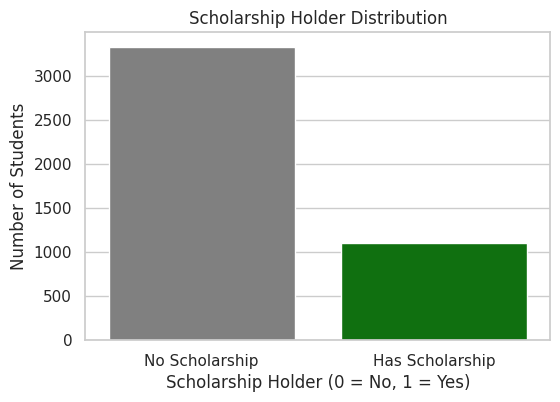

In [113]:
plt.figure(figsize=(6,4))
sns.countplot(x='Scholarship holder', data=df, palette=['gray','green'])
plt.title("Scholarship Holder Distribution")
plt.xlabel("Scholarship Holder (0 = No, 1 = Yes)")
plt.ylabel("Number of Students")
plt.show()

In [114]:
# Dropouts who had no scholarship
dropout_no_scholarship = df[(df['Target'] == 'Dropout') & (df['Scholarship holder'] == 'No Scholarship')]
print("Number of dropouts without scholarship:", dropout_no_scholarship.shape[0])

Number of dropouts without scholarship: 1287


 Total students without scholarship: 3325
 Number of dropouts without scholarship: 1287
 Dropout rate among students without scholarship: 38.71%


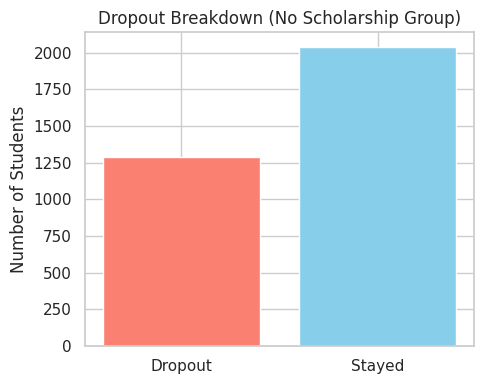

In [115]:
total_no_scholar = df[df['Scholarship holder'] == 'No Scholarship'].shape[0]
drop_no_scholar = 1287
pct_no_scholar_dropout = round((drop_no_scholar / total_no_scholar) * 100, 2)
print(" Total students without scholarship:", total_no_scholar)
print(" Number of dropouts without scholarship:", drop_no_scholar)
print(f" Dropout rate among students without scholarship: {pct_no_scholar_dropout}%")
plt.figure(figsize=(5,4))
plt.bar(['Dropout', 'Stayed'], [drop_no_scholar, total_no_scholar - drop_no_scholar], color=['salmon', 'skyblue'])
plt.title('Dropout Breakdown (No Scholarship Group)')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

A significant portion (38.7%) of students without scholarships dropped out. This indicates that financial support is a critical factor in student retention. Institutions could potentially reduce dropout rates by expanding scholarship availability or offering alternative financial aid options.

In [116]:
low_grade_threshold = 10
# Count students with low grade in 1st & 2nd semester
low_grade_1st = df[df['Curricular units 1st sem (grade)'] < low_grade_threshold].shape[0]
low_grade_2nd = df[df['Curricular units 2nd sem (grade)'] < low_grade_threshold].shape[0]
print(f" Students with grade < {low_grade_threshold} in 1st sem: {low_grade_1st}")
print(f" Students with grade < {low_grade_threshold} in 2nd sem: {low_grade_2nd}")


 Students with grade < 10 in 1st sem: 719
 Students with grade < 10 in 2nd sem: 870


In [117]:
dropped_out_students = df[df['Target'] == 'Dropout']
# From the dropped out students, finding those who had low grades in 1st OR 2nd semester
low_grade_dropouts = dropped_out_students[
    (dropped_out_students['Curricular units 1st sem (grade)'] < low_grade_threshold) |
    (dropped_out_students['Curricular units 2nd sem (grade)'] < low_grade_threshold)
]
count_low_grade_dropouts = low_grade_dropouts.shape[0]
print(f"Number of students who dropped out and had low grades: {count_low_grade_dropouts}")

Number of students who dropped out and had low grades: 751


751 students who dropped out had low grades (<10) in either 1st or 2nd semester.

This shows a strong correlation between academic performance and dropout risk.

Total students who dropped out: 1421 (which i calculated on the top)

Students with grade < 10 in 1st sem: 719

Students with grade < 10 in 2nd sem: 870

Dropouts with grade < 10 in either semester: 751 (as per our filter)

Academic underperformance appears to be a key driver of student dropout. Out of all students who dropped out, 751 (≈53%) had grades below 10 in at least one semester. This suggests that improving academic support early on may significantly reduce dropout rates.

/tmp/ipython-input-118-2931165115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Semester', y='Grade', data=dropout_grades_long, palette='Set2')


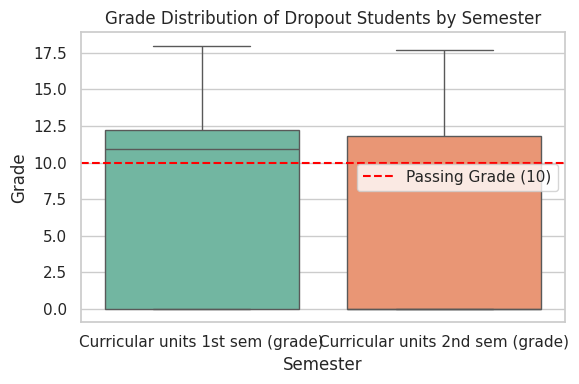

In [118]:
dropouts = df[df['Target'] == 'Dropout']
dropout_grades = dropouts[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']]
dropout_grades_long = dropout_grades.melt(var_name='Semester', value_name='Grade')
# Plot boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Semester', y='Grade', data=dropout_grades_long, palette='Set2')
plt.axhline(10, color='red', linestyle='--', label='Passing Grade (10)')
plt.title("Grade Distribution of Dropout Students by Semester")
plt.ylabel("Grade")
plt.legend()
plt.tight_layout()
plt.show()

A significant portion of dropout students scored below the passing grade (10) in both semesters.

Median grades in the 2nd semester appear lower than in the 1st semester, suggesting declining performance over time.

For 1st semester, the median grade for dropout students is just above 10.

For 2nd semester, the median appears to be around or below 10, often closer to 0, showing many students didn't complete or perform well.

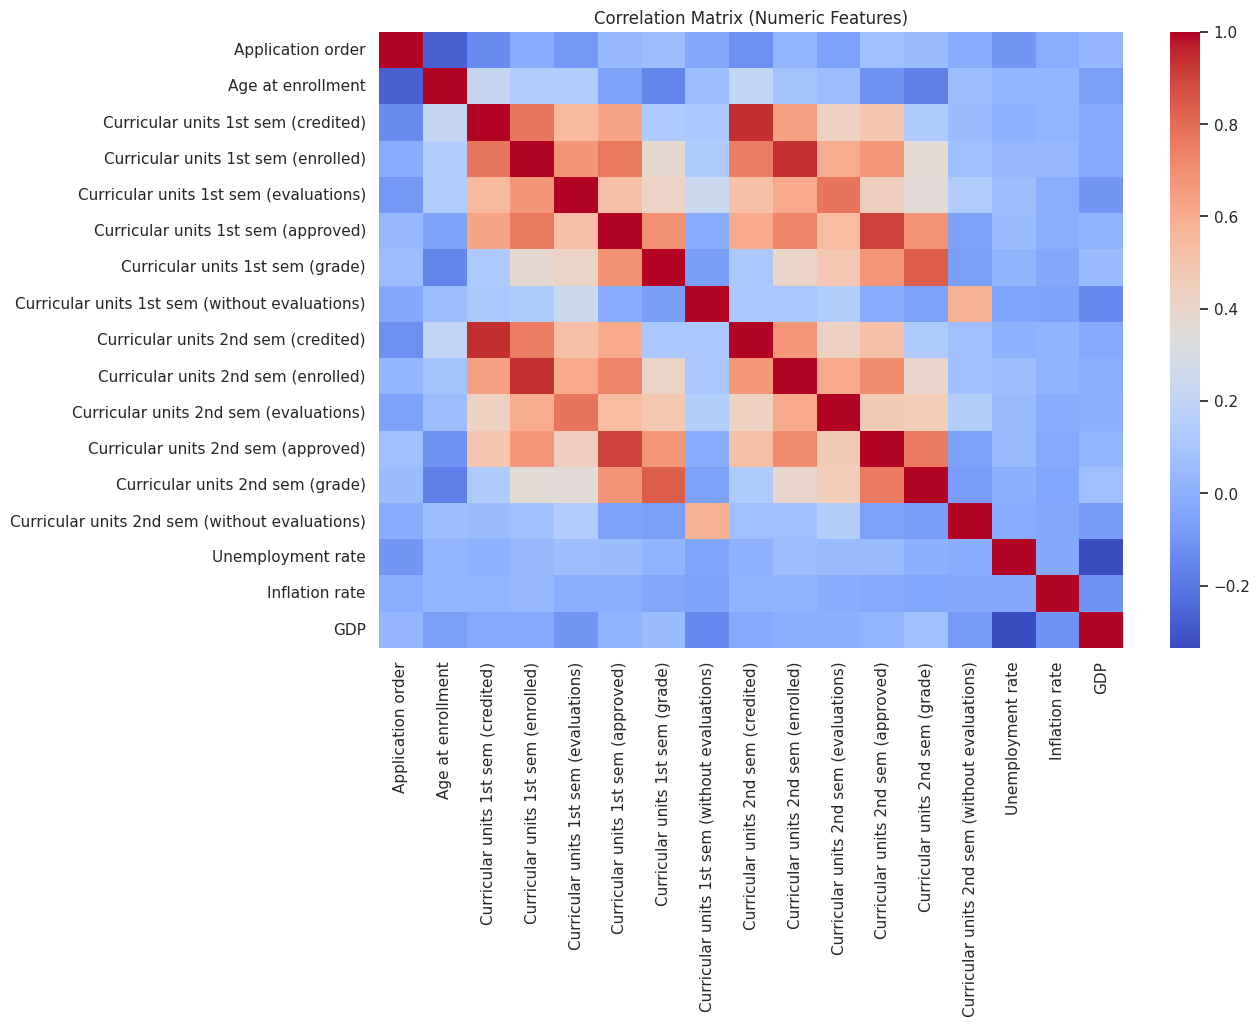

In [119]:
# Numerical features correlation
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

In [120]:
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
top_corr = corr_pairs[(corr_pairs < 1) & (corr_pairs > 0.4)].drop_duplicates()
print(top_corr)

Curricular units 1st sem (credited)             Curricular units 2nd sem (credited)               0.944811
Curricular units 1st sem (enrolled)             Curricular units 2nd sem (enrolled)               0.942627
Curricular units 1st sem (approved)             Curricular units 2nd sem (approved)               0.904002
Curricular units 2nd sem (grade)                Curricular units 1st sem (grade)                  0.837170
Curricular units 1st sem (evaluations)          Curricular units 2nd sem (evaluations)            0.778863
Curricular units 1st sem (credited)             Curricular units 1st sem (enrolled)               0.774344
Curricular units 1st sem (approved)             Curricular units 1st sem (enrolled)               0.769083
Curricular units 2nd sem (grade)                Curricular units 2nd sem (approved)               0.760804
Curricular units 2nd sem (credited)             Curricular units 1st sem (enrolled)               0.753747
Curricular units 2nd sem (enrolled)  

There's a very high correlation between 1st and 2nd semester variables:

Credited, Enrolled, Approved subjects all show correlations above 0.9 between semesters.

Grades in both semesters are highly correlated with approved subjects, e.g.:

1st sem grade <-> 1st sem approved (0.69)

2nd sem grade <-> 2nd sem approved (0.76)

Number of evaluations is positively correlated with approvals and grades. This implies that students who attempt more evaluations tend to succeed more.

##  Final Model Evaluation:
How Well Does the Model Predict Dropouts?


In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(" Model Evaluation Metrics:")
print(f" Accuracy : {accuracy:.2f}")
print(f" Precision: {precision:.2f}")
print(f" Recall   : {recall:.2f}")
print(f" F1-Score : {f1:.2f}")

 Model Evaluation Metrics:
 Accuracy : 0.85
 Precision: 0.86
 Recall   : 0.70
 F1-Score : 0.77


Precision (0.86): Model is highly precise in predicting dropouts, meaning when it says a student will drop out, it's usually correct.

Recall (0.70): The model catches 70% of all actual dropouts, which is decent but can be improved.

F1-Score (0.77): A good balance between precision and recall.

Accuracy (0.85): Overall, the model classifies 85% of all students correctly.

###  Final Evaluation Summary

The model performs well in identifying students at risk of dropping out. With a high precision of 86%, it avoids many false alarms, and the recall of 70% ensures a majority of actual dropouts are captured.

These insights can be used by educational institutions to:

 Intervene early with at-risk students

 Improve academic support or counseling

 Design fee waivers or scholarships for vulnerable groups
